Accuracy: 0.50
Precision (weighted): 0.58
Recall (weighted): 0.50

Classification Report:
               precision    recall  f1-score   support

     fantasy       0.25      0.50      0.33         4
     fiction       1.00      1.00      1.00         1
     mystery       0.62      0.50      0.56        10
 non-fiction       0.67      0.40      0.50         5

    accuracy                           0.50        20
   macro avg       0.64      0.60      0.60        20
weighted avg       0.58      0.50      0.52        20



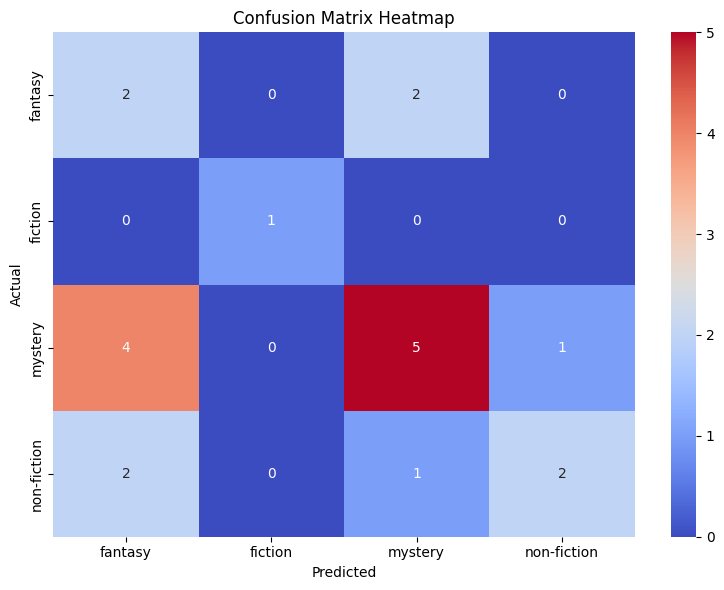

In [6]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("book_genres.csv")  # Make sure the CSV is in your working directory

# Features and target
X = df.drop(columns=['genre'])
y = df['genre']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
report = classification_report(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision (weighted): {precision:.2f}")
print(f"Recall (weighted): {recall:.2f}")
print("\nClassification Report:\n", report)

# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

